<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/12_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install whit_phys_util

     |████████████████████████████████| 10.9 MB 27.9 MB/s 


In [3]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import whit_phys_util as buc

Mounted at /content/drive


In [4]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Cloning repository from GitHub.


$$
\ddot\phi + 2\beta\dot\phi +\omega_0^2\sin\phi = \gamma\omega_0^2\cos\omega t
$$

In [5]:
#given params 
gam = 1.3
omega = 2*np.pi
omega_0 = 1.5*omega
beta = omega_0/4 

phi0_1 = [0,0]
phi0_2 = [0.00001,0]

In [6]:
def dwdt(t,w):
  phi = w[0]
  phi_dot = w[1]
  phi_ddot = -2*beta*phi_dot - omega_0**2*np.sin(phi) + gam*omega_0**2*np.cos(omega*t)
  return[phi_dot, phi_ddot] 

In [11]:
t = np.linspace(0,8,500)
tspan = [0,8]

In [12]:
sol1 = solve_ivp(dwdt,tspan,phi0_1,t_eval=t,rtol = 1e-12)
#sol2 = solve_ivp(dwdt,tspan,phi0_2,t_eval=t,rtol = 1e-12)
#dphi = np.log10(abs(sol2.y[0] - sol1.y[0]))

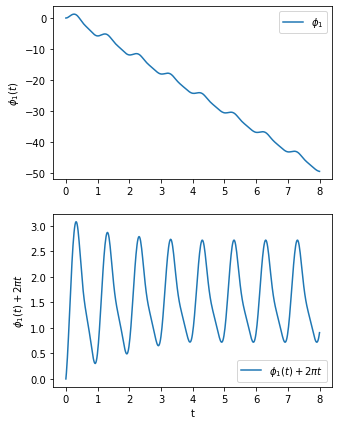

In [21]:
fig, ax = plt.subplots(2, figsize=(5,7))
ax[0].plot(sol1.t,sol1.y[0],label='$\phi_1$')
ax[0].set_ylabel('$\phi_1(t)$');
ax[1].plot(sol1.t, sol1.y[0] + 2*np.pi*sol1.t, label='$\phi_1(t) + 2\pi t$')
ax[1].set_ylabel('$\phi_1(t) + 2\pi t$');
ax[1].set_xlabel('t')
ax[0].legend()
ax[1].legend();

Along with the gradual decrase in angle as demonstrated in the first plot, there are bumps that demonstrate the periodicity in the motion. Once we plot the phase-locked solution we can very clearly see the periodic motion since we are incorporating the decrease in deflection per period. 